In [2]:
import PythonMeta as PMA

def showstudies(studies,dtype):
    #show continuous data
    if dtype.upper()=="CONT":
        text = "%-10s %-30s %-30s \n"%("Study ID","Experiment Group","Control Group")
        text += "%-10s %-10s %-10s %-10s %-10s %-10s %-10s \n"%(" ","m1","sd1","n1","m2","sd2","n2")
        for i in range(len(studies)):
            text += "%-10s %-10s %-10s %-10s %-10s  %-10s %-10s \n"%(
                studies[i][6],        #study ID
                str(studies[i][0]),   #mean of group1
                str(studies[i][1]),   #SD of group1
                str(studies[i][2]),   #total num of group1
                str(studies[i][3]),   #mean of group2
                str(studies[i][4]),   #SD of group2
                str(studies[i][5])    #total num of group2
            )
        return text

    #show dichotomous data
    text = "%-10s %-20s %-20s \n"%("Study ID","Experiment Group","Control Group")
    text += "%-10s %-10s %-10s %-10s %-10s \n"%(" ","e1","n1","e2","n2")
    for i in range(len(studies)):
        text += "%-10s %-10s %-10s %-10s %-10s \n"%(
            studies[i][4],
            str(studies[i][0]),
            str(studies[i][1]),
            str(studies[i][2]),
            str(studies[i][3])
        )
    return text



In [3]:
def showresults(rults):
    text = "%-10s %-6s  %-18s %-10s"%("Study ID","n","ES[95% CI]","Weight(%)\n")
    for i in range(1,len(rults)):
        text += "%-10s %-6d  %-4.2f[%.2f %.2f]   %6.2f\n"%(   # for each study
            rults[i][0],
            rults[i][5],
            rults[i][1],
            rults[i][3],
            rults[i][4],
            100*(rults[i][2]/rults[0][2])  #weight
        )
    text += "%-10s %-6d  %-4.2f[%.2f %.2f]   %6d\n"%(         # for total effect
        rults[0][0],
        rults[0][5],
        rults[0][1],
        rults[0][3],
        rults[0][4],
        100
    )
    text += "%d studies included (N=%d)\n"%(len(rults)-1,rults[0][5])
    text += "Heterogeneity: Tau\u00b2=%.3f "%(rults[0][12]) if not rults[0][12]==None else "Heterogeneity: "
    text += "Q(Chisquare)=%.2f(p=%s); I\u00b2=%s\n"%(
        rults[0][7],     #Q test value
        rults[0][8],     #p value for Q test
        str(round(rults[0][9],2))+"%")   #I-square value
    text += "Overall effect test: z=%.2f, p=%s\n"%(rults[0][10],rults[0][11])  #z-test value and p-value

    return text

In [4]:
def main(stys,settings):
    d = PMA.Data()
    m = PMA.Meta()
    f = PMA.Fig()


    d.datatype = settings["datatype"]
    studies = d.getdata(stys)

    print(showstudies(studies,d.datatype))

    m.subgroup=d.subgroup
    m.datatype=d.datatype
    m.models = settings["models"]
    m.algorithm = settings["algorithm"]
    m.effect = settings["effect"]
    results = m.meta(studies)
    print(m.models + " " + m.algorithm + " " + m.effect)
    print (showresults(results))
    f.forest(results).show()
    f.funnel(results).show()
    print(m.Eggers_test(results))

Study ID   Experiment Group               Control Group                  
           m1         sd1        n1         m2         sd2        n2         
garcia-maciaz2007 19.0       2.0        60.0       15.0        1.0        45.0       
sabes-alsina2017 4.0        4.0        11.0       3.0         2.0        21.0       
blondin2021 7.0        1.0        40.0       11.0        1.0        30.0       
malama2017 4.0        2.0        86.0       7.0         2.0        62.0       
topraggaleh2021 6.0        1.0        24.0       10.0        1.0        21.0       
narud2021  3.0        1.0        20.0       5.0         2.0        24.0       

Random IV SMD
Study ID   n       ES[95% CI]         Weight(%)
garcia-maciaz2007 105     2.41[1.90 2.92]    16.88
sabes-alsina2017 32      0.34[-0.39 1.08]    16.64
blondin2021 70      -3.96[-4.78 -3.13]    16.53
malama2017 148     -1.49[-1.86 -1.12]    16.98
topraggaleh2021 45      -3.93[-4.96 -2.90]    16.23
narud2021  44      -1.21[-1.86 -0.56]    16

D:\Progs\Anaconda\envs\dsenv\lib\site-packages\PythonMeta\core.py:3546: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([round(_x_tran1(x),2) for x in ax.get_xticks()])
C:\Users\forch\AppData\Local\Temp\ipykernel_23792\362509784.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.forest(results).show()                         #show forest plot
D:\Progs\Anaconda\envs\dsenv\lib\site-packages\PythonMeta\core.py:3666: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([round(_x_tran1(x),2) for x in ax.get_xticks()])
C:\Users\forch\AppData\Local\Temp\ipykernel_23792\362509784.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.funnel(results).show()                         #show funnel plot


(-5.8474737058720905, -0.6071366068754418, array(0.57653671), 9.631232311893424, array([-32.58806152,  20.8931141 ]))


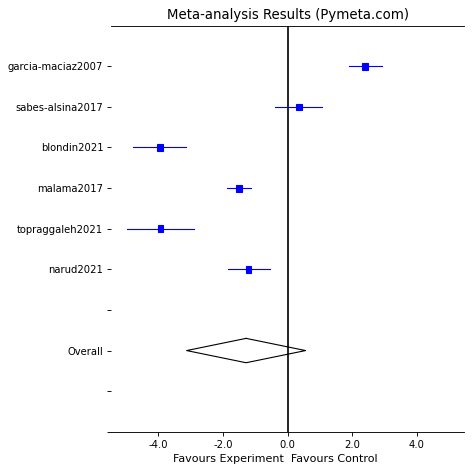

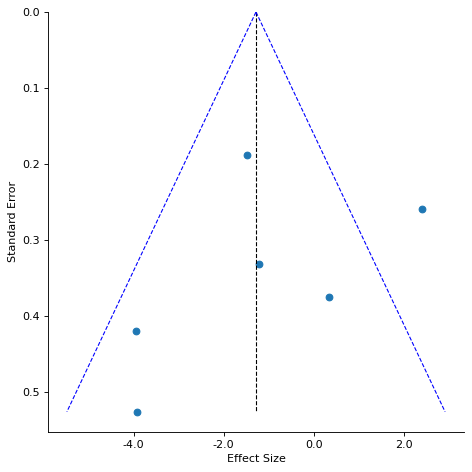

In [5]:
if __name__ == '__main__':
    samp_cont=[
        "garcia-maciaz2007, 19, 2, 60, 15, 1, 45",
        "sabes-alsina2017, 4, 4, 11, 3, 2, 21",
        "blondin2021, 7, 1, 40, 11, 1, 30",
        "malama2017, 4, 2, 86, 7, 2, 62",
        "topraggaleh2021, 6, 1, 24, 10, 1, 21",
        "narud2021, 3, 1, 20, 5, 2, 24",
        " ",
        "#This is a sample of continuous data.",
        "#Input one study in a line;",
        "#Syntax: study name, m1, sd1, n1, m2, sd2, n2",
        "#m1, sd1, n1: mean, SD and number of experiment group;",
        "#m2, sd2, n2: mean, SD and number of control group."]

    settings={
        "datatype":"CONT",  #for CONTinuous data
        "models":"Random",             #models: Fixed or Random
        "algorithm":"IV",             #algorithm: IV
        "effect":"SMD"}                #effect size: MD, SMD
    main(samp_cont,settings)